# Datensatz

https://www.kaggle.com/datasets/alincijov/penn-fudan

# Daten runterladen

Wir benötigen das Paket: `urllib`

pip install PAKETNAME

In [ ]:
!pip list | grep urllib

In [ ]:
from urllib import request
fname = "pedestrian_dataset.zip"
URL = "http://www.juergenbrauer.org/datasets/" + fname

In [ ]:
fname

In [ ]:
URL

In [ ]:
request.urlretrieve(URL, fname)

# Datensatz entpacken

Python Standard Library: 
https://docs.python.org/3/library/

In [ ]:
import shutil

In [ ]:
shutil.unpack_archive(fname, ".")

In [ ]:
!ls -hl

In [ ]:
!ls pedestrian_dataset/PNGImages/

# Alle Dateinamen in eine Liste packen

In [1]:
import os

In [2]:
list_of_image_files = []
for filename in os.listdir("pedestrian_dataset/PNGImages/"):
    if ".png" in filename:
        list_of_image_files.append( "pedestrian_dataset/PNGImages/" + filename )

In [3]:
list_of_image_files

['pedestrian_dataset/PNGImages/PennPed00052.png',
 'pedestrian_dataset/PNGImages/PennPed00024.png',
 'pedestrian_dataset/PNGImages/PennPed00034.png',
 'pedestrian_dataset/PNGImages/PennPed00014.png',
 'pedestrian_dataset/PNGImages/PennPed00081.png',
 'pedestrian_dataset/PNGImages/PennPed00049.png',
 'pedestrian_dataset/PNGImages/PennPed00088.png',
 'pedestrian_dataset/PNGImages/PennPed00089.png',
 'pedestrian_dataset/PNGImages/PennPed00046.png',
 'pedestrian_dataset/PNGImages/PennPed00047.png',
 'pedestrian_dataset/PNGImages/PennPed00053.png',
 'pedestrian_dataset/PNGImages/FudanPed00007.png',
 'pedestrian_dataset/PNGImages/FudanPed00074.png',
 'pedestrian_dataset/PNGImages/PennPed00093.png',
 'pedestrian_dataset/PNGImages/FudanPed00035.png',
 'pedestrian_dataset/PNGImages/PennPed00095.png',
 'pedestrian_dataset/PNGImages/PennPed00082.png',
 'pedestrian_dataset/PNGImages/PennPed00065.png',
 'pedestrian_dataset/PNGImages/PennPed00066.png',
 'pedestrian_dataset/PNGImages/PennPed00037.png

# OpenCV / Beispielbilder anzeigen

Markdown Cheat Sheet: https://www.heise.de/mac-and-i/downloads/65/1/1/6/7/1/0/3/Markdown-CheatSheet-Deutsch.pdf

In [4]:
import cv2

In [5]:
cv2.__version__

'4.5.5'

In [6]:
import matplotlib.pyplot as plt

In [7]:
list_of_image_files[0]

'pedestrian_dataset/PNGImages/PennPed00052.png'

In [8]:
img_bgr = cv2.imread( list_of_image_files[0] )

In [9]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

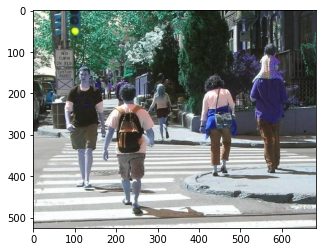

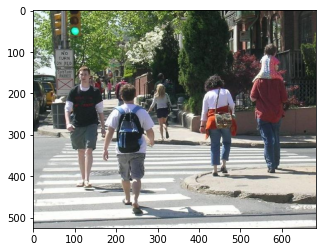

In [10]:
plt.imshow( img_bgr )
plt.show()

plt.imshow( img_rgb )
plt.show()

In [13]:
type( img_rgb )

numpy.ndarray

In [14]:
img_rgb.shape

(525, 682, 3)

In [15]:
img_rgb

array([[[240, 255, 255],
        [236, 251, 254],
        [239, 255, 255],
        ...,
        [ 94,  89,  93],
        [ 46,  41,  45],
        [ 48,  43,  47]],

       [[237, 252, 255],
        [244, 255, 255],
        [237, 253, 253],
        ...,
        [ 68,  63,  67],
        [ 50,  45,  49],
        [ 52,  47,  51]],

       [[234, 249, 254],
        [244, 255, 255],
        [234, 250, 250],
        ...,
        [ 60,  56,  57],
        [ 58,  54,  55],
        [ 60,  56,  57]],

       ...,

       [[179, 179, 181],
        [181, 181, 183],
        [180, 180, 182],
        ...,
        [166, 162, 161],
        [168, 164, 163],
        [168, 164, 163]],

       [[177, 177, 179],
        [180, 180, 182],
        [181, 181, 183],
        ...,
        [164, 160, 159],
        [157, 153, 152],
        [157, 153, 152]],

       [[176, 176, 178],
        [180, 180, 182],
        [182, 182, 184],
        ...,
        [156, 152, 151],
        [165, 161, 160],
        [165, 161, 160]]

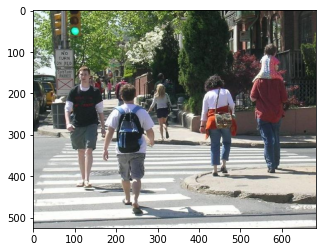

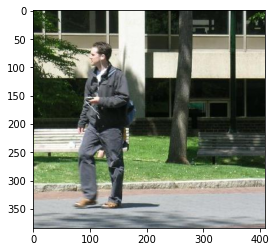

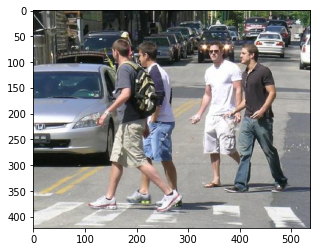

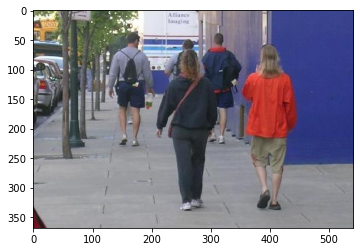

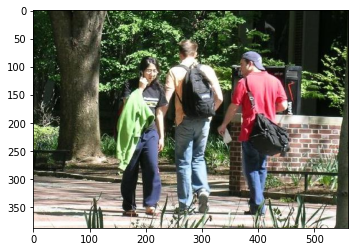

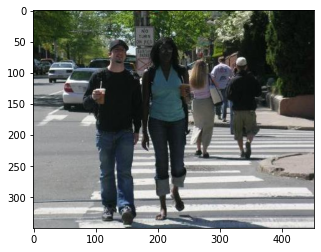

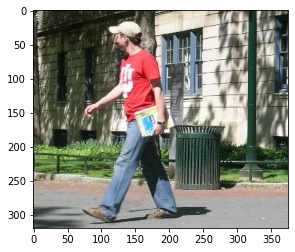

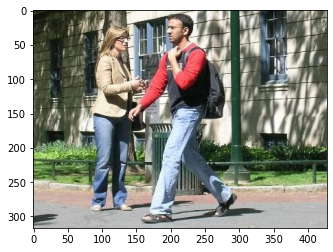

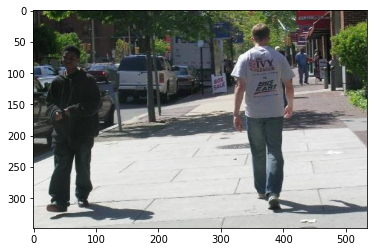

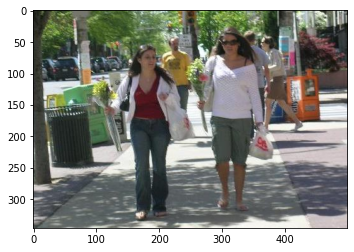

In [16]:
for filename in list_of_image_files[:10]:    
    img_bgr = cv2.imread( filename )
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)    
    plt.imshow( img_rgb )
    plt.show()

# CV damals (2005): HOGDetector

## Das Paper

[Link zum Paper](https://lear.inrialpes.fr/people/triggs/pubs/Dalal-cvpr05.pdf)

Stichworte:

- Sliding Window
  https://pyimagesearch.com/2015/03/23/sliding-windows-for-object-detection-with-python-and-opencv/
  
- Bildpyramide

- HOG Deskriptorvektor

- SVM Klassifikator (Support Vector Machine)

## Ein Bild einlesen und als Graufstufenbild vorbereiten

In [18]:
list_of_image_files[0]

'pedestrian_dataset/PNGImages/PennPed00052.png'

In [19]:
img_bgr = cv2.imread( list_of_image_files[0] )

In [20]:
img_bgr.shape

(525, 682, 3)

In [22]:
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

In [23]:
img_gray.shape

(525, 682)

In [24]:
img_gray.min()

0

In [25]:
img_gray.max()

255

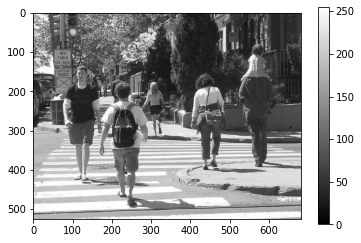

In [29]:
plt.imshow(img_gray, cmap="gray")
plt.colorbar()
plt.show()

## Nach Personen im Bild mit dem HOGDetector suchen

In [30]:
hog = cv2.HOGDescriptor()

In [31]:
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

In [32]:
boxes, weights = hog.detectMultiScale(img_gray, winStride=(8,8))

In [35]:
type(boxes)

numpy.ndarray

In [36]:
type(weights)

numpy.ndarray

In [37]:
boxes

array([[266, 160,  93, 186],
       [398, 238,  89, 177],
       [200, 317,  95, 191],
       [369, 118, 161, 322],
       [ 39, 121, 180, 359],
       [163, 218, 149, 296],
       [478,  68, 187, 374]], dtype=int32)

In [38]:
boxes.shape

(7, 4)

In [39]:
weights

array([1.26085031, 1.13196816, 0.41723269, 1.93091093, 1.95417769,
       1.13536068, 1.2157222 ])

In [40]:
visu = img_gray.copy()

In [41]:
visu.shape

(525, 682)

In [43]:
img_gray

array([[251, 247, 250, ...,  91,  43,  45],
       [248, 252, 248, ...,  65,  47,  49],
       [245, 252, 245, ...,  57,  55,  57],
       ...,
       [179, 181, 180, ..., 163, 165, 165],
       [177, 180, 181, ..., 161, 154, 154],
       [176, 180, 182, ..., 153, 162, 162]], dtype=uint8)

In [45]:
visu = cv2.cvtColor(visu, cv2.COLOR_GRAY2BGR)
visu

array([[[251, 251, 251],
        [247, 247, 247],
        [250, 250, 250],
        ...,
        [ 91,  91,  91],
        [ 43,  43,  43],
        [ 45,  45,  45]],

       [[248, 248, 248],
        [252, 252, 252],
        [248, 248, 248],
        ...,
        [ 65,  65,  65],
        [ 47,  47,  47],
        [ 49,  49,  49]],

       [[245, 245, 245],
        [252, 252, 252],
        [245, 245, 245],
        ...,
        [ 57,  57,  57],
        [ 55,  55,  55],
        [ 57,  57,  57]],

       ...,

       [[179, 179, 179],
        [181, 181, 181],
        [180, 180, 180],
        ...,
        [163, 163, 163],
        [165, 165, 165],
        [165, 165, 165]],

       [[177, 177, 177],
        [180, 180, 180],
        [181, 181, 181],
        ...,
        [161, 161, 161],
        [154, 154, 154],
        [154, 154, 154]],

       [[176, 176, 176],
        [180, 180, 180],
        [182, 182, 182],
        ...,
        [153, 153, 153],
        [162, 162, 162],
        [162, 162, 162]]

In [46]:
visu.shape

(525, 682, 3)

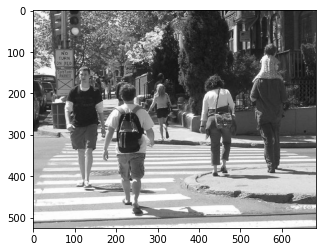

In [47]:
plt.imshow(visu)
plt.show()

In [50]:
t1 = 2,3,4

In [51]:
type(t1)

tuple

In [52]:
t1

(2, 3, 4)

In [53]:
x,y,z = t1

In [54]:
x

2

In [55]:
y

3

In [56]:
z

4

In [59]:
for (x,y,w,h) in boxes:
    cv2.rectangle(visu, (x,y), (x+w, y+h), (0,255,0), 2)

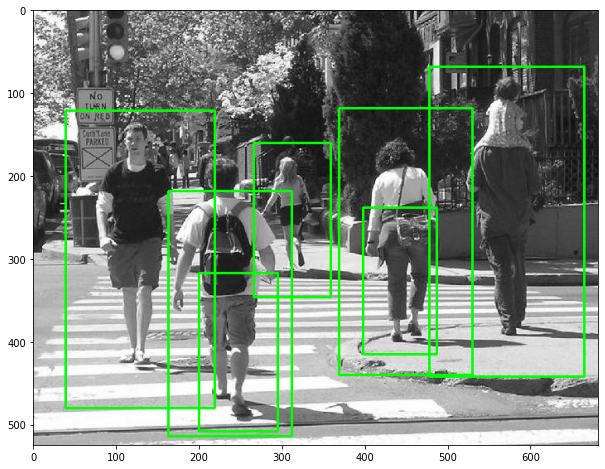

In [62]:
plt.figure( figsize=(12,8) )
plt.imshow(visu)
plt.show()